In [1]:
%matplotlib inline

import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from models.WGAN2 import WGAN
from utils.loaders import load_cifar

In [2]:
# run params
SECTION = 'gan'
RUN_ID = '0003'
DATA_NAME = 'airplane2(WGAN2_1024_batchsize)'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' #'load' #

In [3]:
label = 0
(x_train, y_train) = load_cifar(label, 10)

In [4]:
print(tf.keras.backend.int_shape(x_train))

(6000, 32, 32, 3)


In [5]:
if mode == 'build':

    gan = WGAN(input_dim = (32,32,3)
            , critic_conv_filters = [32,64,128,128]
            , critic_conv_kernel_size = [4,4,4,4]
            , critic_conv_strides = [2,2,2,2]
            , critic_batch_norm_momentum = None
            , critic_activation = 'leaky_relu'
            , critic_dropout_rate = None
            , critic_learning_rate = 0.00006
            , generator_initial_dense_layer_size = (2,2,128)
            , generator_upsample = [2,2,1,1]
            , generator_conv_filters = [128,64,32,3]
            , generator_conv_kernel_size = [3,3,3,3]
            , generator_conv_strides = [1,1,1,1]
            , generator_batch_norm_momentum = 0.9
            , generator_activation = 'leaky_relu'
            , generator_dropout_rate = 0.5
            , generator_learning_rate = 0.00006
            , optimiser = 'rmsprop'
            , z_dim = 100
            )
    gan.save(RUN_FOLDER)

else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [6]:
gan.critic.summary()
gan.generator.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
critic_input (InputLayer)    [(None, 32, 32, 3)]       0         
_________________________________________________________________
critic_conv_0 (Conv2D)       (None, 16, 16, 32)        1568      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 16, 16, 32)        0         
_________________________________________________________________
critic_conv_1 (Conv2D)       (None, 8, 8, 64)          32832     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 8, 8, 64)          0         
_________________________________________________________________
critic_conv_2 (Conv2D)       (None, 4, 4, 128)         131200    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 4, 4, 128)         0     

In [7]:
BATCH_SIZE = 1024
EPOCHS = 10000
PRINT_EVERY_N_BATCHES = 100
N_CRITIC = 6
CLIP_THRESHOLD = 0.01

In [8]:
%%time
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
    , n_critic = N_CRITIC
    , clip_threshold = CLIP_THRESHOLD
)

0 [D loss: (-0.00001)(R -0.00022, F 0.00020)]  [G loss: -0.00019] 
1 [D loss: (-0.00020)(R -0.00057, F 0.00016)]  [G loss: -0.00055] 
2 [D loss: (-0.00145)(R -0.00296, F 0.00005)]  [G loss: -0.00318] 
3 [D loss: (-0.00679)(R -0.01334, F -0.00024)]  [G loss: -0.01513] 
4 [D loss: (-0.02135)(R -0.04209, F -0.00061)]  [G loss: -0.05030] 
5 [D loss: (-0.04853)(R -0.09591, F -0.00114)]  [G loss: -0.12710] 
6 [D loss: (-0.09555)(R -0.18932, F -0.00177)]  [G loss: -0.26900] 
7 [D loss: (-0.16240)(R -0.32317, F -0.00163)]  [G loss: -0.49692] 
8 [D loss: (-0.25679)(R -0.51762, F 0.00404)]  [G loss: -0.84423] 
9 [D loss: (-0.37575)(R -0.77290, F 0.02141)]  [G loss: -1.32115] 
10 [D loss: (-0.52273)(R -1.10203, F 0.05657)]  [G loss: -1.96667] 
11 [D loss: (-0.70070)(R -1.50754, F 0.10615)]  [G loss: -2.81410] 
12 [D loss: (-0.89981)(R -1.97811, F 0.17849)]  [G loss: -3.86570] 
13 [D loss: (-1.15299)(R -2.57944, F 0.27346)]  [G loss: -5.14680] 
14 [D loss: (-1.35579)(R -3.09156, F 0.37998)]  [G lo

117 [D loss: (3.79708)(R -68.99809, F 76.59226)]  [G loss: -49.09682] 
118 [D loss: (3.19794)(R -68.16308, F 74.55896)]  [G loss: -48.96421] 
119 [D loss: (2.64495)(R -68.08372, F 73.37363)]  [G loss: -48.88673] 
120 [D loss: (2.10218)(R -66.59342, F 70.79778)]  [G loss: -48.91969] 
121 [D loss: (2.16583)(R -64.63972, F 68.97139)]  [G loss: -48.74208] 
122 [D loss: (1.60093)(R -64.81917, F 68.02102)]  [G loss: -48.89795] 
123 [D loss: (0.03019)(R -65.44699, F 65.50738)]  [G loss: -49.12492] 
124 [D loss: (0.43561)(R -62.95964, F 63.83087)]  [G loss: -49.27435] 
125 [D loss: (-0.15197)(R -63.20554, F 62.90160)]  [G loss: -49.70472] 
126 [D loss: (0.50391)(R -61.12032, F 62.12814)]  [G loss: -50.16365] 
127 [D loss: (-0.34190)(R -61.59717, F 60.91337)]  [G loss: -50.52325] 
128 [D loss: (-1.32596)(R -62.81810, F 60.16618)]  [G loss: -51.05468] 
129 [D loss: (-1.63490)(R -62.19125, F 58.92145)]  [G loss: -51.61108] 
130 [D loss: (-0.42063)(R -59.82276, F 58.98149)]  [G loss: -52.18989] 
1

230 [D loss: (2.86695)(R -35.29636, F 41.03027)]  [G loss: -46.34915] 
231 [D loss: (2.98453)(R -33.40784, F 39.37690)]  [G loss: -43.73569] 
232 [D loss: (3.13255)(R -31.31390, F 37.57901)]  [G loss: -41.10964] 
233 [D loss: (2.57597)(R -30.39904, F 35.55097)]  [G loss: -38.42019] 
234 [D loss: (2.24969)(R -29.07745, F 33.57682)]  [G loss: -36.01845] 
235 [D loss: (2.31664)(R -26.90558, F 31.53886)]  [G loss: -33.76967] 
236 [D loss: (2.09613)(R -25.48552, F 29.67777)]  [G loss: -31.53058] 
237 [D loss: (1.69785)(R -24.43188, F 27.82757)]  [G loss: -29.54084] 
238 [D loss: (1.52132)(R -23.15829, F 26.20093)]  [G loss: -27.72828] 
239 [D loss: (1.33105)(R -21.95575, F 24.61785)]  [G loss: -26.03918] 
240 [D loss: (1.44783)(R -20.17544, F 23.07110)]  [G loss: -24.46248] 
241 [D loss: (0.69524)(R -20.37825, F 21.76874)]  [G loss: -23.10260] 
242 [D loss: (0.69117)(R -19.06153, F 20.44388)]  [G loss: -21.80304] 
243 [D loss: (0.27020)(R -18.73511, F 19.27551)]  [G loss: -20.68326] 
244 [D

349 [D loss: (0.05894)(R -7.14495, F 7.26283)]  [G loss: -6.21325] 
350 [D loss: (-0.05804)(R -7.01771, F 6.90164)]  [G loss: -5.88239] 
351 [D loss: (-0.00271)(R -6.40701, F 6.40159)]  [G loss: -5.50958] 
352 [D loss: (-0.11578)(R -6.09384, F 5.86228)]  [G loss: -5.11524] 
353 [D loss: (-0.21617)(R -5.87768, F 5.44533)]  [G loss: -4.72223] 
354 [D loss: (-0.26583)(R -5.49908, F 4.96743)]  [G loss: -4.34177] 
355 [D loss: (-0.48239)(R -5.43157, F 4.46679)]  [G loss: -3.95050] 
356 [D loss: (-0.51704)(R -5.05541, F 4.02134)]  [G loss: -3.59793] 
357 [D loss: (-0.73873)(R -5.06097, F 3.58351)]  [G loss: -3.31801] 
358 [D loss: (-0.94132)(R -5.19998, F 3.31735)]  [G loss: -3.16048] 
359 [D loss: (-0.87954)(R -4.88347, F 3.12438)]  [G loss: -3.03837] 
360 [D loss: (-1.04835)(R -5.08740, F 2.99070)]  [G loss: -2.98949] 
361 [D loss: (-1.29368)(R -5.45094, F 2.86359)]  [G loss: -2.92176] 
362 [D loss: (-1.39032)(R -5.53153, F 2.75088)]  [G loss: -2.86001] 
363 [D loss: (-1.60585)(R -5.84199,

467 [D loss: (0.54212)(R -4.18852, F 5.27276)]  [G loss: -5.12071] 
468 [D loss: (0.51389)(R -3.69343, F 4.72121)]  [G loss: -4.69982] 
469 [D loss: (0.45883)(R -3.48607, F 4.40373)]  [G loss: -4.39031] 
470 [D loss: (0.40245)(R -3.43222, F 4.23711)]  [G loss: -4.06204] 
471 [D loss: (0.46802)(R -3.12709, F 4.06313)]  [G loss: -3.75356] 
472 [D loss: (0.40525)(R -2.85685, F 3.66735)]  [G loss: -3.47717] 
473 [D loss: (0.31969)(R -2.77862, F 3.41799)]  [G loss: -3.22368] 
474 [D loss: (0.31484)(R -2.60685, F 3.23654)]  [G loss: -3.00414] 
475 [D loss: (0.20213)(R -2.50530, F 2.90956)]  [G loss: -2.76969] 
476 [D loss: (0.26105)(R -2.28226, F 2.80436)]  [G loss: -2.55894] 
477 [D loss: (0.19141)(R -2.14515, F 2.52797)]  [G loss: -2.40499] 
478 [D loss: (0.14538)(R -2.13361, F 2.42437)]  [G loss: -2.23260] 
479 [D loss: (0.16379)(R -1.93584, F 2.26342)]  [G loss: -2.11886] 
480 [D loss: (0.09368)(R -1.94827, F 2.13562)]  [G loss: -2.00430] 
481 [D loss: (0.11163)(R -1.81846, F 2.04172)]  

587 [D loss: (-0.17538)(R -1.34427, F 0.99352)]  [G loss: -0.97175] 
588 [D loss: (-0.14528)(R -1.35744, F 1.06688)]  [G loss: -0.99090] 
589 [D loss: (-0.09649)(R -1.33182, F 1.13883)]  [G loss: -1.02941] 
590 [D loss: (-0.06558)(R -1.30636, F 1.17520)]  [G loss: -1.03929] 
591 [D loss: (-0.04560)(R -1.26159, F 1.17039)]  [G loss: -1.05504] 
592 [D loss: (-0.04877)(R -1.27318, F 1.17564)]  [G loss: -1.06102] 
593 [D loss: (-0.03469)(R -1.25966, F 1.19028)]  [G loss: -1.05513] 
594 [D loss: (-0.00558)(R -1.17547, F 1.16431)]  [G loss: -1.00347] 
595 [D loss: (-0.01300)(R -1.18004, F 1.15403)]  [G loss: -0.98843] 
596 [D loss: (0.02668)(R -1.12292, F 1.17628)]  [G loss: -0.95238] 
597 [D loss: (0.04740)(R -1.10876, F 1.20356)]  [G loss: -0.90340] 
598 [D loss: (0.03095)(R -1.06068, F 1.12257)]  [G loss: -0.90077] 
599 [D loss: (-0.00068)(R -1.06284, F 1.06147)]  [G loss: -0.84151] 
600 [D loss: (-0.00657)(R -1.05079, F 1.03766)]  [G loss: -0.81312] 
601 [D loss: (0.01782)(R -1.00563, F 

707 [D loss: (-0.29306)(R -1.90138, F 1.31527)]  [G loss: -1.04619] 
708 [D loss: (-0.32344)(R -2.11280, F 1.46592)]  [G loss: -1.18113] 
709 [D loss: (-0.33681)(R -2.20376, F 1.53014)]  [G loss: -1.37659] 
710 [D loss: (-0.39247)(R -2.38594, F 1.60099)]  [G loss: -1.57693] 
711 [D loss: (-0.39414)(R -2.50339, F 1.71510)]  [G loss: -1.84978] 
712 [D loss: (-0.30606)(R -2.50520, F 1.89308)]  [G loss: -1.97650] 
713 [D loss: (-0.24798)(R -2.57955, F 2.08358)]  [G loss: -2.23415] 
714 [D loss: (-0.17795)(R -2.60439, F 2.24850)]  [G loss: -2.39502] 
715 [D loss: (-0.19352)(R -2.61220, F 2.22517)]  [G loss: -2.60010] 
716 [D loss: (0.06425)(R -2.36683, F 2.49533)]  [G loss: -2.61719] 
717 [D loss: (0.03429)(R -2.16137, F 2.22995)]  [G loss: -2.52079] 
718 [D loss: (0.07560)(R -2.06304, F 2.21424)]  [G loss: -2.25589] 
719 [D loss: (0.05599)(R -1.88031, F 1.99229)]  [G loss: -1.99828] 
720 [D loss: (0.01883)(R -1.67395, F 1.71162)]  [G loss: -1.56921] 
721 [D loss: (-0.00673)(R -1.51281, F 1

827 [D loss: (-0.56863)(R -2.27061, F 1.13334)]  [G loss: -1.15717] 
828 [D loss: (-0.64624)(R -2.37508, F 1.08261)]  [G loss: -1.10845] 
829 [D loss: (-0.70612)(R -2.43863, F 1.02640)]  [G loss: -0.95014] 
830 [D loss: (-0.76649)(R -2.45664, F 0.92367)]  [G loss: -0.77040] 
831 [D loss: (-0.90329)(R -2.56278, F 0.75620)]  [G loss: -0.60654] 
832 [D loss: (-0.97073)(R -2.66904, F 0.72758)]  [G loss: -0.57717] 
833 [D loss: (-0.97394)(R -2.83234, F 0.88447)]  [G loss: -0.63019] 
834 [D loss: (-0.88421)(R -2.84202, F 1.07360)]  [G loss: -0.74019] 
835 [D loss: (-0.79636)(R -3.01861, F 1.42588)]  [G loss: -0.86530] 
836 [D loss: (-0.62240)(R -2.87584, F 1.63104)]  [G loss: -0.96395] 
837 [D loss: (-0.52985)(R -2.86947, F 1.80978)]  [G loss: -1.00739] 
838 [D loss: (-0.50030)(R -2.67178, F 1.67118)]  [G loss: -1.04041] 
839 [D loss: (-0.39602)(R -2.52616, F 1.73412)]  [G loss: -0.96332] 
840 [D loss: (-0.57366)(R -2.60300, F 1.45569)]  [G loss: -0.87049] 
841 [D loss: (-0.66193)(R -2.49932

946 [D loss: (-0.65529)(R -6.56965, F 5.25907)]  [G loss: -4.68691] 
947 [D loss: (-0.65757)(R -6.53243, F 5.21729)]  [G loss: -4.54022] 
948 [D loss: (-0.65608)(R -6.54559, F 5.23343)]  [G loss: -4.29119] 
949 [D loss: (-0.61724)(R -6.43346, F 5.19898)]  [G loss: -4.48465] 
950 [D loss: (-0.66491)(R -6.51033, F 5.18050)]  [G loss: -4.62702] 
951 [D loss: (-0.73762)(R -6.59565, F 5.12041)]  [G loss: -4.59032] 
952 [D loss: (-0.78870)(R -6.63490, F 5.05749)]  [G loss: -4.47601] 
953 [D loss: (-0.83827)(R -6.60429, F 4.92774)]  [G loss: -4.39596] 
954 [D loss: (-0.84097)(R -6.56700, F 4.88507)]  [G loss: -4.31741] 
955 [D loss: (-0.90715)(R -6.50600, F 4.69170)]  [G loss: -4.02616] 
956 [D loss: (-0.92621)(R -6.44398, F 4.59156)]  [G loss: -3.95255] 
957 [D loss: (-0.94974)(R -6.38582, F 4.48634)]  [G loss: -4.05134] 
958 [D loss: (-0.97228)(R -6.42614, F 4.48158)]  [G loss: -3.95003] 
959 [D loss: (-0.96128)(R -6.31717, F 4.39461)]  [G loss: -3.90977] 
960 [D loss: (-0.96946)(R -6.29718

1064 [D loss: (-0.91511)(R -9.63361, F 7.80338)]  [G loss: -7.37880] 
1065 [D loss: (-0.98255)(R -9.27435, F 7.30926)]  [G loss: -7.13964] 
1066 [D loss: (-0.86166)(R -9.18437, F 7.46105)]  [G loss: -7.42002] 
1067 [D loss: (-0.78146)(R -9.08258, F 7.51967)]  [G loss: -7.62188] 
1068 [D loss: (-0.77608)(R -9.24891, F 7.69676)]  [G loss: -7.75370] 
1069 [D loss: (-0.82768)(R -9.23191, F 7.57654)]  [G loss: -7.59013] 
1070 [D loss: (-0.79528)(R -9.11421, F 7.52366)]  [G loss: -7.42235] 
1071 [D loss: (-0.77585)(R -9.04994, F 7.49823)]  [G loss: -7.21607] 
1072 [D loss: (-0.84257)(R -8.99371, F 7.30858)]  [G loss: -7.09979] 
1073 [D loss: (-0.98782)(R -8.94471, F 6.96907)]  [G loss: -6.93130] 
1074 [D loss: (-1.01383)(R -9.36652, F 7.33886)]  [G loss: -7.49679] 
1075 [D loss: (-1.07504)(R -8.93952, F 6.78943)]  [G loss: -6.30315] 
1076 [D loss: (-1.04090)(R -9.33026, F 7.24846)]  [G loss: -7.61689] 
1077 [D loss: (-0.96737)(R -9.18028, F 7.24554)]  [G loss: -7.46745] 
1078 [D loss: (-0.95

1180 [D loss: (-0.44533)(R -10.77153, F 9.88087)]  [G loss: -12.61136] 
1181 [D loss: (-0.09706)(R -10.81695, F 10.62282)]  [G loss: -14.35156] 
1182 [D loss: (0.04622)(R -10.96579, F 11.05824)]  [G loss: -12.76726] 
1183 [D loss: (-0.13775)(R -11.42664, F 11.15115)]  [G loss: -12.56441] 
1184 [D loss: (-0.47404)(R -12.02684, F 11.07876)]  [G loss: -10.79205] 
1185 [D loss: (-0.91447)(R -12.74020, F 10.91127)]  [G loss: -9.16685] 
1186 [D loss: (-1.17947)(R -13.18243, F 10.82349)]  [G loss: -8.66404] 
1187 [D loss: (-1.28484)(R -13.45226, F 10.88257)]  [G loss: -8.42814] 
1188 [D loss: (-1.46667)(R -13.70522, F 10.77188)]  [G loss: -8.95327] 
1189 [D loss: (-1.55916)(R -13.73672, F 10.61840)]  [G loss: -9.09194] 
1190 [D loss: (-1.71890)(R -13.97033, F 10.53252)]  [G loss: -9.00941] 
1191 [D loss: (-1.74816)(R -14.02015, F 10.52383)]  [G loss: -9.32845] 
1192 [D loss: (-1.70098)(R -14.44288, F 11.04093)]  [G loss: -11.04901] 
1193 [D loss: (-1.44721)(R -14.68865, F 11.79423)]  [G loss:

1295 [D loss: (-1.22929)(R -14.27656, F 11.81798)]  [G loss: -11.49977] 
1296 [D loss: (-1.25235)(R -13.92893, F 11.42423)]  [G loss: -11.55891] 
1297 [D loss: (-1.16079)(R -13.56132, F 11.23973)]  [G loss: -11.77850] 
1298 [D loss: (-0.99978)(R -12.86417, F 10.86461)]  [G loss: -11.78453] 
1299 [D loss: (-1.00615)(R -12.41551, F 10.40322)]  [G loss: -12.05133] 
1300 [D loss: (-1.10098)(R -11.98903, F 9.78708)]  [G loss: -13.28508] 
1301 [D loss: (-0.99021)(R -11.40413, F 9.42371)]  [G loss: -12.27159] 
1302 [D loss: (-1.17595)(R -10.47162, F 8.11971)]  [G loss: -5.67374] 
1303 [D loss: (-1.54204)(R -9.57026, F 6.48617)]  [G loss: -3.20281] 
1304 [D loss: (-1.54632)(R -9.38183, F 6.28918)]  [G loss: -3.12994] 
1305 [D loss: (-1.59652)(R -9.27734, F 6.08430)]  [G loss: -3.34239] 
1306 [D loss: (-1.47606)(R -8.85277, F 5.90066)]  [G loss: -3.74847] 
1307 [D loss: (-1.53627)(R -8.90641, F 5.83387)]  [G loss: -4.21162] 
1308 [D loss: (-1.74060)(R -9.09114, F 5.60993)]  [G loss: -4.87311] 


1409 [D loss: (0.08286)(R -17.66887, F 17.83459)]  [G loss: -19.87369] 
1410 [D loss: (-0.17684)(R -17.76822, F 17.41455)]  [G loss: -18.18495] 
1411 [D loss: (-0.44614)(R -17.56676, F 16.67448)]  [G loss: -16.10332] 
1412 [D loss: (-0.74321)(R -17.26915, F 15.78272)]  [G loss: -14.20584] 
1413 [D loss: (-0.82055)(R -16.81078, F 15.16969)]  [G loss: -13.17865] 
1414 [D loss: (-0.35361)(R -15.47268, F 14.76545)]  [G loss: -12.16345] 
1415 [D loss: (-1.13845)(R -14.03617, F 11.75926)]  [G loss: -9.87670] 
1416 [D loss: (-1.55371)(R -13.17112, F 10.06370)]  [G loss: -9.04311] 
1417 [D loss: (-1.68341)(R -12.28873, F 8.92191)]  [G loss: -8.29682] 
1418 [D loss: (-1.82356)(R -11.98312, F 8.33599)]  [G loss: -7.47870] 
1419 [D loss: (-2.11026)(R -11.79923, F 7.57871)]  [G loss: -6.82166] 
1420 [D loss: (-2.12558)(R -11.58837, F 7.33720)]  [G loss: -7.03922] 
1421 [D loss: (-2.13622)(R -11.48151, F 7.20907)]  [G loss: -7.53623] 
1422 [D loss: (-1.80210)(R -10.98958, F 7.38538)]  [G loss: -7.2

1523 [D loss: (-1.65927)(R -15.48329, F 12.16475)]  [G loss: -11.51376] 
1524 [D loss: (-2.12348)(R -14.76549, F 10.51853)]  [G loss: -10.79173] 
1525 [D loss: (-2.58639)(R -14.70596, F 9.53318)]  [G loss: -10.25419] 
1526 [D loss: (-2.71916)(R -14.38825, F 8.94992)]  [G loss: -9.77244] 
1527 [D loss: (-2.69136)(R -14.32073, F 8.93800)]  [G loss: -9.39393] 
1528 [D loss: (-2.87696)(R -14.52013, F 8.76620)]  [G loss: -9.01603] 
1529 [D loss: (-3.25164)(R -15.10205, F 8.59876)]  [G loss: -8.71525] 
1530 [D loss: (-3.45466)(R -15.69957, F 8.79026)]  [G loss: -9.01101] 
1531 [D loss: (-3.82997)(R -16.44713, F 8.78719)]  [G loss: -10.29594] 
1532 [D loss: (-3.63423)(R -17.10455, F 9.83608)]  [G loss: -11.56917] 
1533 [D loss: (-3.04722)(R -16.88274, F 10.78830)]  [G loss: -11.89681] 
1534 [D loss: (-2.38064)(R -16.29741, F 11.53612)]  [G loss: -11.87454] 
1535 [D loss: (-1.89234)(R -16.42437, F 12.63968)]  [G loss: -12.47602] 
1536 [D loss: (-1.26137)(R -15.78868, F 13.26594)]  [G loss: -13

1636 [D loss: (-0.75402)(R -13.21671, F 11.70866)]  [G loss: -17.65357] 
1637 [D loss: (-0.85283)(R -13.54404, F 11.83839)]  [G loss: -17.29198] 
1638 [D loss: (-0.66828)(R -13.64174, F 12.30518)]  [G loss: -15.74407] 
1639 [D loss: (-0.75522)(R -13.97381, F 12.46336)]  [G loss: -13.12337] 
1640 [D loss: (-1.00144)(R -14.08843, F 12.08555)]  [G loss: -10.49438] 
1641 [D loss: (-1.25003)(R -14.21176, F 11.71170)]  [G loss: -8.31136] 
1642 [D loss: (-1.28726)(R -13.92912, F 11.35461)]  [G loss: -7.78225] 
1643 [D loss: (-1.59253)(R -13.14131, F 9.95625)]  [G loss: -7.64906] 
1644 [D loss: (-2.09782)(R -12.46434, F 8.26869)]  [G loss: -7.68301] 
1645 [D loss: (-2.15057)(R -12.38355, F 8.08241)]  [G loss: -8.12395] 
1646 [D loss: (-2.05943)(R -12.26678, F 8.14792)]  [G loss: -7.44155] 
1647 [D loss: (-2.21548)(R -12.19822, F 7.76727)]  [G loss: -6.69095] 
1648 [D loss: (-2.23704)(R -12.18887, F 7.71479)]  [G loss: -7.44287] 
1649 [D loss: (-2.25453)(R -12.39605, F 7.88698)]  [G loss: -9.42

1750 [D loss: (-3.66682)(R -17.19043, F 9.85679)]  [G loss: -6.63325] 
1751 [D loss: (-3.92834)(R -18.15781, F 10.30113)]  [G loss: -6.96732] 
1752 [D loss: (-3.88136)(R -18.75107, F 10.98835)]  [G loss: -8.46887] 
1753 [D loss: (-3.69020)(R -19.23416, F 11.85377)]  [G loss: -10.47429] 
1754 [D loss: (-3.92166)(R -19.84147, F 11.99816)]  [G loss: -12.43179] 
1755 [D loss: (-3.48848)(R -19.70766, F 12.73069)]  [G loss: -13.17633] 
1756 [D loss: (-3.94212)(R -20.14373, F 12.25948)]  [G loss: -13.58650] 
1757 [D loss: (-3.79010)(R -19.92859, F 12.34839)]  [G loss: -13.09435] 
1758 [D loss: (-3.65367)(R -19.56503, F 12.25769)]  [G loss: -13.33927] 
1759 [D loss: (-3.68710)(R -19.34869, F 11.97449)]  [G loss: -13.00590] 
1760 [D loss: (-3.52930)(R -19.45656, F 12.39795)]  [G loss: -14.09316] 
1761 [D loss: (-2.88866)(R -19.62553, F 13.84821)]  [G loss: -15.14191] 
1762 [D loss: (-2.46339)(R -19.92772, F 15.00095)]  [G loss: -16.93700] 
1763 [D loss: (-1.53616)(R -19.74953, F 16.67722)]  [G 

1864 [D loss: (-0.59631)(R -12.67123, F 11.47861)]  [G loss: -17.27166] 
1865 [D loss: (-0.22363)(R -13.25571, F 12.80845)]  [G loss: -18.40729] 
1866 [D loss: (0.10278)(R -13.50096, F 13.70652)]  [G loss: -19.57113] 
1867 [D loss: (0.33607)(R -13.88699, F 14.55912)]  [G loss: -19.12038] 
1868 [D loss: (0.12525)(R -14.74075, F 14.99124)]  [G loss: -16.16778] 
1869 [D loss: (-0.17119)(R -15.17842, F 14.83605)]  [G loss: -12.67865] 
1870 [D loss: (-0.32394)(R -15.37258, F 14.72470)]  [G loss: -11.31021] 
1871 [D loss: (-0.35509)(R -15.00198, F 14.29181)]  [G loss: -10.89482] 
1872 [D loss: (-0.65218)(R -14.18184, F 12.87748)]  [G loss: -10.20352] 
1873 [D loss: (-1.04243)(R -13.40026, F 11.31540)]  [G loss: -9.44740] 
1874 [D loss: (-1.33121)(R -12.63529, F 9.97288)]  [G loss: -8.87364] 
1875 [D loss: (-1.64526)(R -11.94456, F 8.65403)]  [G loss: -8.61350] 
1876 [D loss: (-1.92671)(R -11.44678, F 7.59336)]  [G loss: -8.58089] 
1877 [D loss: (-2.05587)(R -11.46566, F 7.35392)]  [G loss: -

1978 [D loss: (-4.14266)(R -15.20131, F 6.91599)]  [G loss: -8.83937] 
1979 [D loss: (-4.07581)(R -16.00688, F 7.85525)]  [G loss: -13.27381] 
1980 [D loss: (-3.56959)(R -16.43068, F 9.29150)]  [G loss: -19.70799] 
1981 [D loss: (-3.59046)(R -18.06436, F 10.88345)]  [G loss: -24.72454] 
1982 [D loss: (-1.92877)(R -17.55469, F 13.69715)]  [G loss: -30.50839] 
1983 [D loss: (-0.19020)(R -18.02413, F 17.64373)]  [G loss: -36.52441] 
1984 [D loss: (1.52607)(R -18.09995, F 21.15210)]  [G loss: -37.90696] 
1985 [D loss: (2.83163)(R -17.39788, F 23.06115)]  [G loss: -34.16476] 
1986 [D loss: (2.52570)(R -17.40859, F 22.46000)]  [G loss: -27.89733] 
1987 [D loss: (1.63525)(R -17.22913, F 20.49963)]  [G loss: -20.84327] 
1988 [D loss: (0.40738)(R -17.28900, F 18.10375)]  [G loss: -15.15165] 
1989 [D loss: (-0.41705)(R -17.28683, F 16.45272)]  [G loss: -11.63354] 
1990 [D loss: (-0.37681)(R -16.62171, F 15.86808)]  [G loss: -11.24719] 
1991 [D loss: (-0.35661)(R -15.62584, F 14.91262)]  [G loss:

2093 [D loss: (-2.44481)(R -10.66316, F 5.77355)]  [G loss: -8.92243] 
2094 [D loss: (-2.30892)(R -10.68961, F 6.07176)]  [G loss: -9.75525] 
2095 [D loss: (-1.99599)(R -10.91492, F 6.92295)]  [G loss: -10.58182] 
2096 [D loss: (-2.07007)(R -11.82695, F 7.68681)]  [G loss: -10.90820] 
2097 [D loss: (-1.77790)(R -12.42011, F 8.86432)]  [G loss: -11.57323] 
2098 [D loss: (-1.17143)(R -13.02780, F 10.68494)]  [G loss: -13.65071] 
2099 [D loss: (-0.65086)(R -13.26016, F 11.95844)]  [G loss: -15.34235] 
2100 [D loss: (-0.32610)(R -12.60262, F 11.95043)]  [G loss: -14.38855] 
2101 [D loss: (-0.32962)(R -12.65752, F 11.99828)]  [G loss: -14.37876] 
2102 [D loss: (-0.43442)(R -13.16381, F 12.29496)]  [G loss: -13.22033] 
2103 [D loss: (-0.80576)(R -13.61050, F 11.99898)]  [G loss: -11.53893] 
2104 [D loss: (-1.24917)(R -13.86490, F 11.36657)]  [G loss: -10.59823] 
2105 [D loss: (-1.66761)(R -14.06691, F 10.73170)]  [G loss: -10.61177] 
2106 [D loss: (-1.78545)(R -13.82542, F 10.25451)]  [G los

2208 [D loss: (-0.40264)(R -13.41535, F 12.61006)]  [G loss: -23.20033] 
2209 [D loss: (0.08785)(R -12.59971, F 12.77541)]  [G loss: -22.59968] 
2210 [D loss: (0.26170)(R -11.58510, F 12.10851)]  [G loss: -21.21166] 
2211 [D loss: (-0.04954)(R -11.49529, F 11.39621)]  [G loss: -19.06386] 
2212 [D loss: (-0.39659)(R -11.04371, F 10.25052)]  [G loss: -16.05478] 
2213 [D loss: (-0.86197)(R -11.11142, F 9.38748)]  [G loss: -12.98330] 
2214 [D loss: (-1.51107)(R -11.09284, F 8.07071)]  [G loss: -9.79426] 
2215 [D loss: (-2.14234)(R -10.92363, F 6.63895)]  [G loss: -6.94137] 
2216 [D loss: (-2.69291)(R -10.81472, F 5.42891)]  [G loss: -4.89017] 
2217 [D loss: (-3.23793)(R -10.91289, F 4.43704)]  [G loss: -3.94793] 
2218 [D loss: (-3.59090)(R -11.08512, F 3.90333)]  [G loss: -3.36699] 
2219 [D loss: (-4.00469)(R -11.19104, F 3.18166)]  [G loss: -2.88785] 
2220 [D loss: (-4.32238)(R -11.34434, F 2.69958)]  [G loss: -2.46201] 
2221 [D loss: (-4.70265)(R -11.87016, F 2.46487)]  [G loss: -2.28185

2322 [D loss: (-0.90170)(R -10.33393, F 8.53052)]  [G loss: -8.35054] 
2323 [D loss: (-0.75300)(R -10.39381, F 8.88781)]  [G loss: -9.02941] 
2324 [D loss: (-0.67456)(R -10.49042, F 9.14130)]  [G loss: -9.81719] 
2325 [D loss: (-0.36535)(R -10.77741, F 10.04671)]  [G loss: -11.13252] 
2326 [D loss: (-0.26532)(R -11.29554, F 10.76490)]  [G loss: -11.30491] 
2327 [D loss: (-0.14847)(R -11.69917, F 11.40223)]  [G loss: -12.48114] 
2328 [D loss: (-0.16729)(R -12.25744, F 11.92285)]  [G loss: -10.81442] 
2329 [D loss: (-0.58430)(R -13.36146, F 12.19285)]  [G loss: -10.70819] 
2330 [D loss: (-0.68522)(R -14.07798, F 12.70753)]  [G loss: -10.68593] 
2331 [D loss: (-0.40461)(R -14.57626, F 13.76704)]  [G loss: -11.86303] 
2332 [D loss: (-0.29614)(R -14.14864, F 13.55637)]  [G loss: -12.27262] 
2333 [D loss: (-0.46896)(R -14.03348, F 13.09555)]  [G loss: -12.11012] 
2334 [D loss: (-0.64880)(R -14.13616, F 12.83855)]  [G loss: -12.08115] 
2335 [D loss: (-0.69681)(R -14.10245, F 12.70883)]  [G lo

2436 [D loss: (-3.08169)(R -10.23834, F 4.07497)]  [G loss: -6.19780] 
2437 [D loss: (-3.12585)(R -10.18025, F 3.92855)]  [G loss: -7.35527] 
2438 [D loss: (-3.19805)(R -10.28091, F 3.88481)]  [G loss: -9.44253] 
2439 [D loss: (-2.73829)(R -10.22538, F 4.74880)]  [G loss: -12.23196] 
2440 [D loss: (-2.74959)(R -10.72331, F 5.22413)]  [G loss: -12.48335] 
2441 [D loss: (-2.94658)(R -11.78615, F 5.89300)]  [G loss: -13.51566] 
2442 [D loss: (-3.13971)(R -13.69477, F 7.41535)]  [G loss: -14.55394] 
2443 [D loss: (-3.21167)(R -15.39076, F 8.96742)]  [G loss: -16.90185] 
2444 [D loss: (-2.41847)(R -16.64906, F 11.81211)]  [G loss: -20.32373] 
2445 [D loss: (-1.61513)(R -16.90432, F 13.67405)]  [G loss: -23.14762] 
2446 [D loss: (-0.47296)(R -16.56554, F 15.61962)]  [G loss: -24.63868] 
2447 [D loss: (-0.43551)(R -16.56063, F 15.68962)]  [G loss: -24.14019] 
2448 [D loss: (0.33885)(R -15.51442, F 16.19213)]  [G loss: -22.36148] 
2449 [D loss: (0.32704)(R -14.06496, F 14.71904)]  [G loss: -19

2551 [D loss: (-1.08744)(R -8.37291, F 6.19803)]  [G loss: -6.84677] 
2552 [D loss: (-1.78230)(R -9.01030, F 5.44570)]  [G loss: -5.42995] 
2553 [D loss: (-2.22468)(R -9.57319, F 5.12383)]  [G loss: -4.30157] 
2554 [D loss: (-3.01202)(R -10.71078, F 4.68675)]  [G loss: -3.55087] 
2555 [D loss: (-3.28780)(R -11.12407, F 4.54847)]  [G loss: -3.55408] 
2556 [D loss: (-3.38502)(R -11.62741, F 4.85737)]  [G loss: -4.01017] 
2557 [D loss: (-3.65205)(R -12.35356, F 5.04946)]  [G loss: -4.79050] 
2558 [D loss: (-3.87714)(R -12.90456, F 5.15027)]  [G loss: -5.55069] 
2559 [D loss: (-3.69667)(R -12.98587, F 5.59254)]  [G loss: -6.59462] 
2560 [D loss: (-3.67520)(R -13.45387, F 6.10347)]  [G loss: -7.83237] 
2561 [D loss: (-2.62915)(R -12.92048, F 7.66218)]  [G loss: -9.34839] 
2562 [D loss: (-1.50330)(R -12.12735, F 9.12075)]  [G loss: -10.60621] 
2563 [D loss: (-0.74750)(R -12.95947, F 11.46447)]  [G loss: -10.73539] 
2564 [D loss: (-1.21977)(R -14.03929, F 11.59975)]  [G loss: -10.29876] 
2565

2667 [D loss: (-0.80034)(R -10.36121, F 8.76053)]  [G loss: -7.55418] 
2668 [D loss: (-0.88668)(R -10.36186, F 8.58850)]  [G loss: -7.69274] 
2669 [D loss: (-0.91409)(R -10.35092, F 8.52275)]  [G loss: -7.93710] 
2670 [D loss: (-0.91992)(R -10.60348, F 8.76363)]  [G loss: -8.25777] 
2671 [D loss: (-0.81168)(R -10.71411, F 9.09076)]  [G loss: -8.18329] 
2672 [D loss: (-0.92443)(R -11.07740, F 9.22855)]  [G loss: -8.44888] 
2673 [D loss: (-0.81120)(R -10.97954, F 9.35714)]  [G loss: -8.79004] 
2674 [D loss: (-0.75763)(R -10.90023, F 9.38496)]  [G loss: -8.76958] 
2675 [D loss: (-0.78273)(R -10.72997, F 9.16450)]  [G loss: -8.48742] 
2676 [D loss: (-0.81866)(R -10.51302, F 8.87570)]  [G loss: -8.02773] 
2677 [D loss: (-0.91481)(R -10.26558, F 8.43596)]  [G loss: -7.49069] 
2678 [D loss: (-0.98426)(R -9.96095, F 7.99242)]  [G loss: -7.21222] 
2679 [D loss: (-1.01156)(R -9.78819, F 7.76507)]  [G loss: -7.18318] 
2680 [D loss: (-1.02798)(R -9.76553, F 7.70957)]  [G loss: -7.33980] 
2681 [D l

2784 [D loss: (-1.97494)(R -13.36452, F 9.41465)]  [G loss: -16.63597] 
2785 [D loss: (-1.17971)(R -13.12161, F 10.76218)]  [G loss: -17.45779] 
2786 [D loss: (-0.76377)(R -13.31561, F 11.78806)]  [G loss: -17.04640] 
2787 [D loss: (-0.64724)(R -12.79642, F 11.50194)]  [G loss: -15.10691] 
2788 [D loss: (-0.57715)(R -12.30335, F 11.14904)]  [G loss: -12.78079] 
2789 [D loss: (-0.89692)(R -11.58965, F 9.79581)]  [G loss: -9.75479] 
2790 [D loss: (-1.36327)(R -10.97358, F 8.24704)]  [G loss: -6.96595] 
2791 [D loss: (-1.85398)(R -10.21451, F 6.50656)]  [G loss: -4.71108] 
2792 [D loss: (-2.19945)(R -9.76375, F 5.36484)]  [G loss: -3.41523] 
2793 [D loss: (-2.41003)(R -9.56942, F 4.74935)]  [G loss: -3.01165] 
2794 [D loss: (-2.18906)(R -9.62121, F 5.24310)]  [G loss: -3.01406] 
2795 [D loss: (-1.81572)(R -9.73896, F 6.10752)]  [G loss: -3.68417] 
2796 [D loss: (-1.98884)(R -10.45525, F 6.47757)]  [G loss: -4.75001] 
2797 [D loss: (-2.01683)(R -11.06378, F 7.03012)]  [G loss: -6.19217] 
2

2901 [D loss: (-1.34511)(R -6.96530, F 4.27509)]  [G loss: -3.07131] 
2902 [D loss: (-1.53295)(R -6.51067, F 3.44477)]  [G loss: -3.91336] 
2903 [D loss: (-1.53702)(R -6.39360, F 3.31956)]  [G loss: -4.55336] 
2904 [D loss: (-1.57595)(R -6.50639, F 3.35449)]  [G loss: -6.41550] 
2905 [D loss: (-1.28787)(R -6.72385, F 4.14811)]  [G loss: -5.96423] 
2906 [D loss: (-1.52813)(R -7.31933, F 4.26307)]  [G loss: -8.62152] 
2907 [D loss: (-1.16056)(R -7.57823, F 5.25712)]  [G loss: -4.16294] 
2908 [D loss: (-1.02568)(R -7.60110, F 5.54973)]  [G loss: -6.40680] 
2909 [D loss: (-1.23929)(R -8.11003, F 5.63145)]  [G loss: -3.72765] 
2910 [D loss: (-1.29972)(R -8.30450, F 5.70505)]  [G loss: -3.62774] 
2911 [D loss: (-1.39932)(R -8.32121, F 5.52257)]  [G loss: -3.95079] 
2912 [D loss: (-1.49418)(R -8.23691, F 5.24856)]  [G loss: -4.00972] 
2913 [D loss: (-1.64252)(R -8.40691, F 5.12187)]  [G loss: -4.01590] 
2914 [D loss: (-1.82400)(R -8.78244, F 5.13444)]  [G loss: -4.75450] 
2915 [D loss: (-1.78

3018 [D loss: (-0.44881)(R -10.50707, F 9.60945)]  [G loss: -14.45388] 
3019 [D loss: (-0.61007)(R -9.85545, F 8.63531)]  [G loss: -11.62607] 
3020 [D loss: (-1.11663)(R -9.48422, F 7.25097)]  [G loss: -8.31768] 
3021 [D loss: (-1.78637)(R -9.08620, F 5.51346)]  [G loss: -4.88888] 
3022 [D loss: (-2.48628)(R -8.83600, F 3.86345)]  [G loss: -1.85024] 
3023 [D loss: (-2.89923)(R -8.89889, F 3.10043)]  [G loss: -1.32606] 
3024 [D loss: (-2.96179)(R -9.24233, F 3.31875)]  [G loss: -1.86684] 
3025 [D loss: (-2.89452)(R -10.17773, F 4.38870)]  [G loss: -3.26055] 
3026 [D loss: (-2.47304)(R -10.55646, F 5.61037)]  [G loss: -5.36270] 
3027 [D loss: (-2.46686)(R -11.38413, F 6.45040)]  [G loss: -7.26692] 
3028 [D loss: (-2.07977)(R -11.33276, F 7.17322)]  [G loss: -8.51314] 
3029 [D loss: (-1.77956)(R -11.51518, F 7.95606)]  [G loss: -9.34626] 
3030 [D loss: (-1.76591)(R -11.99121, F 8.45939)]  [G loss: -10.23340] 
3031 [D loss: (-1.61878)(R -11.85259, F 8.61502)]  [G loss: -10.67258] 
3032 [D 

3134 [D loss: (-0.12224)(R -12.61249, F 12.36801)]  [G loss: -13.36812] 
3135 [D loss: (-0.25669)(R -12.32062, F 11.80723)]  [G loss: -10.94861] 
3136 [D loss: (-0.77335)(R -11.98197, F 10.43527)]  [G loss: -8.51870] 
3137 [D loss: (-0.95105)(R -11.03065, F 9.12855)]  [G loss: -6.91093] 
3138 [D loss: (-1.33436)(R -10.03405, F 7.36532)]  [G loss: -5.53279] 
3139 [D loss: (-1.76312)(R -9.06871, F 5.54246)]  [G loss: -4.11755] 
3140 [D loss: (-2.35581)(R -8.51334, F 3.80172)]  [G loss: -2.56776] 
3141 [D loss: (-2.48982)(R -7.79116, F 2.81152)]  [G loss: -1.91445] 
3142 [D loss: (-2.46885)(R -7.54279, F 2.60509)]  [G loss: -2.07062] 
3143 [D loss: (-2.34835)(R -7.59345, F 2.89676)]  [G loss: -2.68157] 
3144 [D loss: (-2.08813)(R -7.84342, F 3.66715)]  [G loss: -3.52650] 
3145 [D loss: (-1.92103)(R -8.46663, F 4.62456)]  [G loss: -4.64828] 
3146 [D loss: (-2.02838)(R -9.10049, F 5.04373)]  [G loss: -6.08477] 
3147 [D loss: (-1.89763)(R -10.02122, F 6.22596)]  [G loss: -7.40119] 
3148 [D l

KeyboardInterrupt: 

In [9]:
gan.sample_images(RUN_FOLDER)

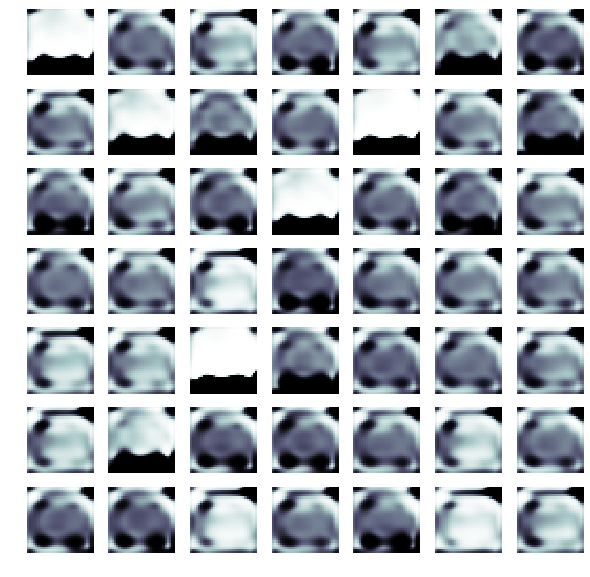

In [14]:
import numpy as np
r, c = 7, 7
noise = np.random.normal(0, 1, (r * c, gan.z_dim))
gen_imgs = gan.generator.predict(noise)

#Rescale images 0 - 1

gen_imgs = 0.5 * (gen_imgs + 1)
# gen_imgs = np.clip(gen_imgs, 0, 1)

fig, axs = plt.subplots(r, c, figsize=(10,10))
cnt = 0

for i in range(r):
    for j in range(c):
        axs[i,j].imshow(gen_imgs[cnt][:,:,0], cmap = plt.cm.bone)
        axs[i,j].axis('off')
        cnt += 1
fig.savefig(os.path.join(RUN_FOLDER, "images/sample.png"))
plt.show()

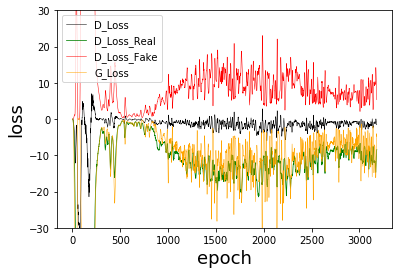

In [13]:
#batch 1024 / 3182 epoch
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.5, label = 'D_Loss')

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.75, label = 'D_Loss_Real')
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.5, label = 'D_Loss_Fake')
plt.plot(gan.g_losses, color='orange', linewidth=0.5, label = "G_Loss")

plt.xlabel('epoch', fontsize=18)
plt.ylabel('loss', fontsize=18)

# plt.xlim(0, 2000)
plt.ylim(-30, 30)
plt.legend()
plt.show()

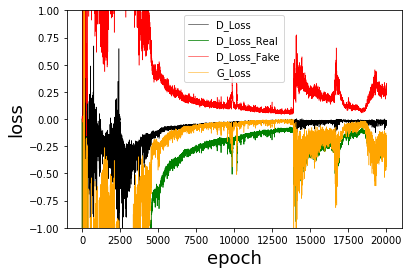

In [13]:
#batch 512 / 20000 epoch
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.5, label = 'D_Loss')

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.75, label = 'D_Loss_Real')
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.5, label = 'D_Loss_Fake')
plt.plot(gan.g_losses, color='orange', linewidth=0.5, label = "G_Loss")

plt.xlabel('epoch', fontsize=18)
plt.ylabel('loss', fontsize=18)

# plt.xlim(0, 2000)
plt.ylim(-1, 1)
plt.legend()
plt.show()

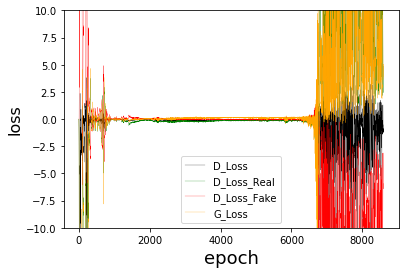

In [21]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25, label = 'D_Loss')

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25, label = 'D_Loss_Real')
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25, label = 'D_Loss_Fake')
plt.plot(gan.g_losses, color='orange', linewidth=0.25, label = "G_Loss")

plt.xlabel('epoch', fontsize=18)
plt.ylabel('loss', fontsize=16)

# plt.xlim(0, 2000)
plt.ylim(-10, 10)
plt.legend()
plt.show()